In [1]:
%matplotlib notebook

In [2]:
import pyspark

sc = pyspark.sql.SparkSession.Builder().getOrCreate()

## Levanto los archivos

In [3]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
birds_recep = sc.read.json('datos/day-birds.jsonlines/').rdd

## Utils

### Cantidad de recepciones por antena

#### (2) ¿Todas las antenas tienen el mismo impacto? ¿O hay antenas con más emisiones/más puntos alcanzables?

<IPython.core.display.Javascript object>


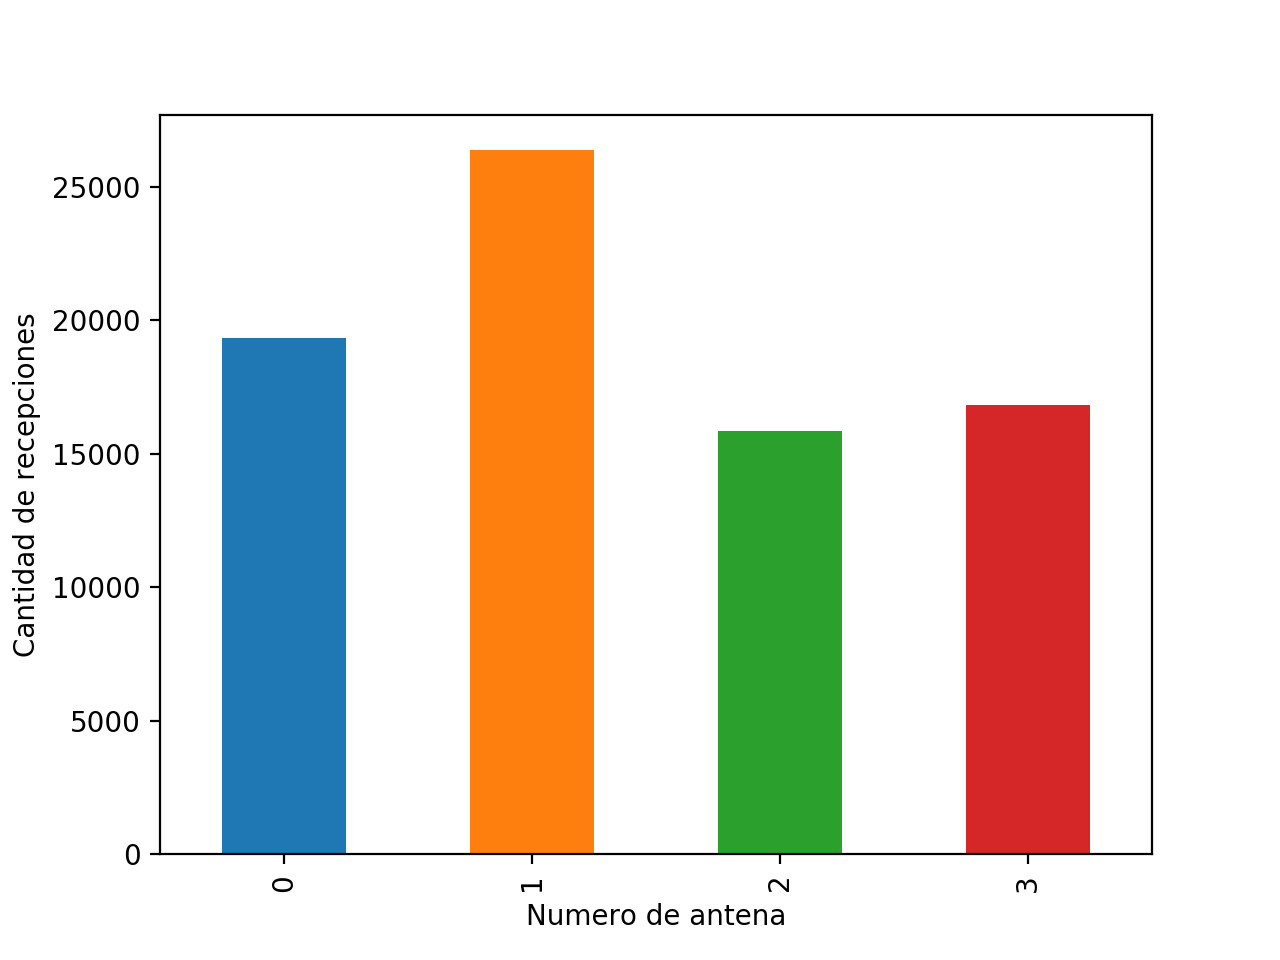

Text(0.5,0,'Numero de antena')

In [5]:
cants_recep_por_antena = []
for i in range(4):
    cant = birds_recep.filter(lambda x: x['recep_{}'.format(i)] > 0).count()
    cants_recep_por_antena.append({'antenna': i, 'cant_recep': cant})
    
p = pd.DataFrame(cants_recep_por_antena).plot.bar(x='antenna', y='cant_recep', legend=False)
p.set_ylabel('Cantidad de recepciones')
p.set_xlabel('Numero de antena')


### Promedio y stdev de las potencias recibidas por antena

#### (3.5) ¿Todas las antenas reciben señales con la misma intensidad?

<IPython.core.display.Javascript object>


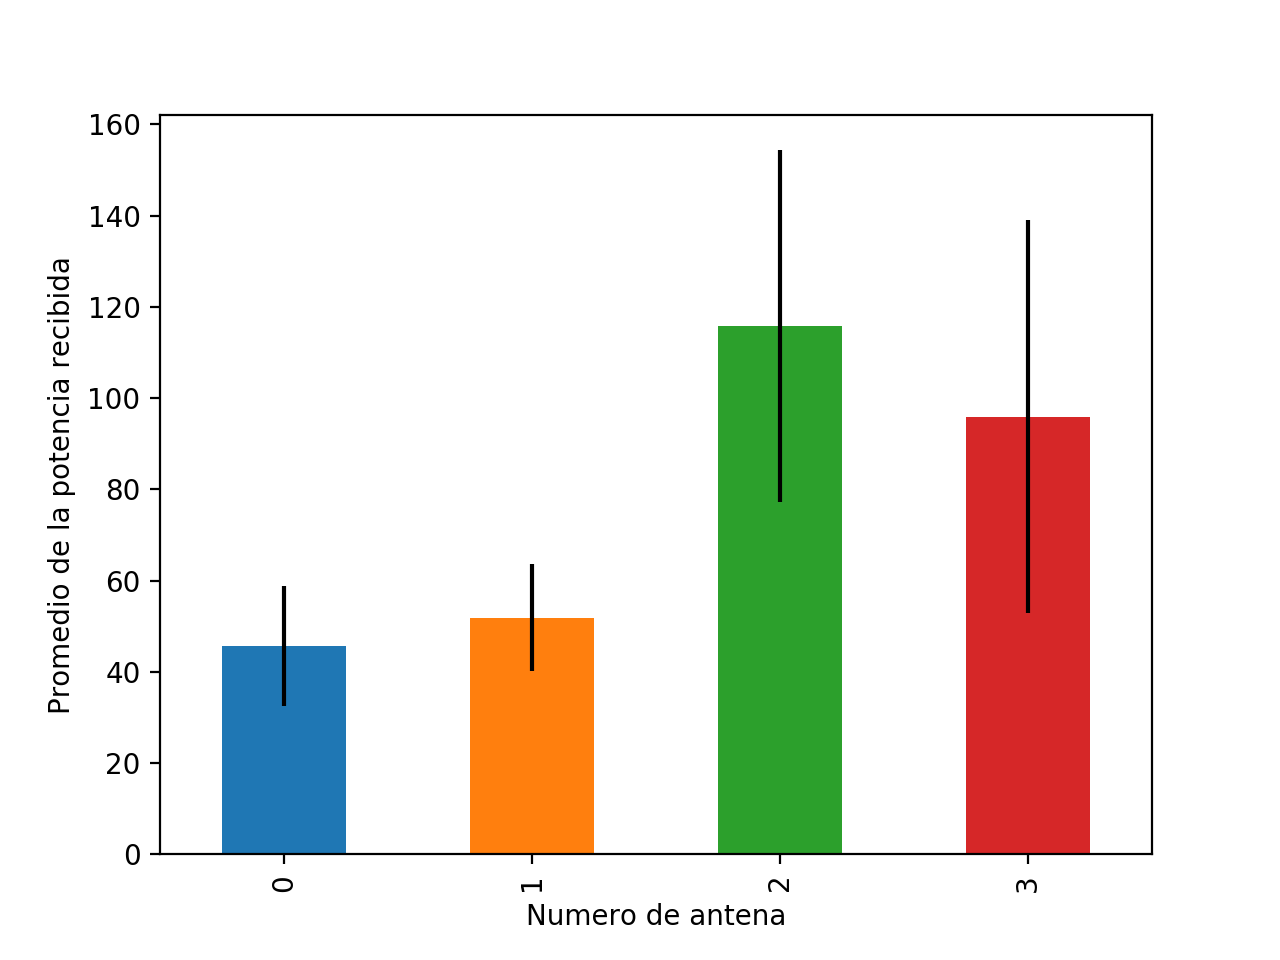

Text(0.5,0,'Numero de antena')

In [16]:
same_emisions_mean_and_std = []
for i in range(4):
    recep_field = 'recep_{}'.format(i)
    recepciones = birds_recep.filter(lambda x: x[recep_field] > 0).map(lambda x: x[recep_field])
    mean = recepciones.mean()
    stdev = recepciones.stdev()
    same_emisions_mean_and_std.append({'antenna': i, 'mean': mean, 'stdev': stdev})
    
p = pd.DataFrame(same_emisions_mean_and_std).plot.bar(x='antenna', y='mean', yerr='stdev', legend=False)
p.set_ylabel('Promedio de la potencia recibida')
p.set_xlabel('Numero de antena')


### Cantidad de emisions que usan _x_ cantidad de antenas

#### (9) ¿Cuantos emisiones usan 1 antena? ¿Y 2 antenas?

<IPython.core.display.Javascript object>


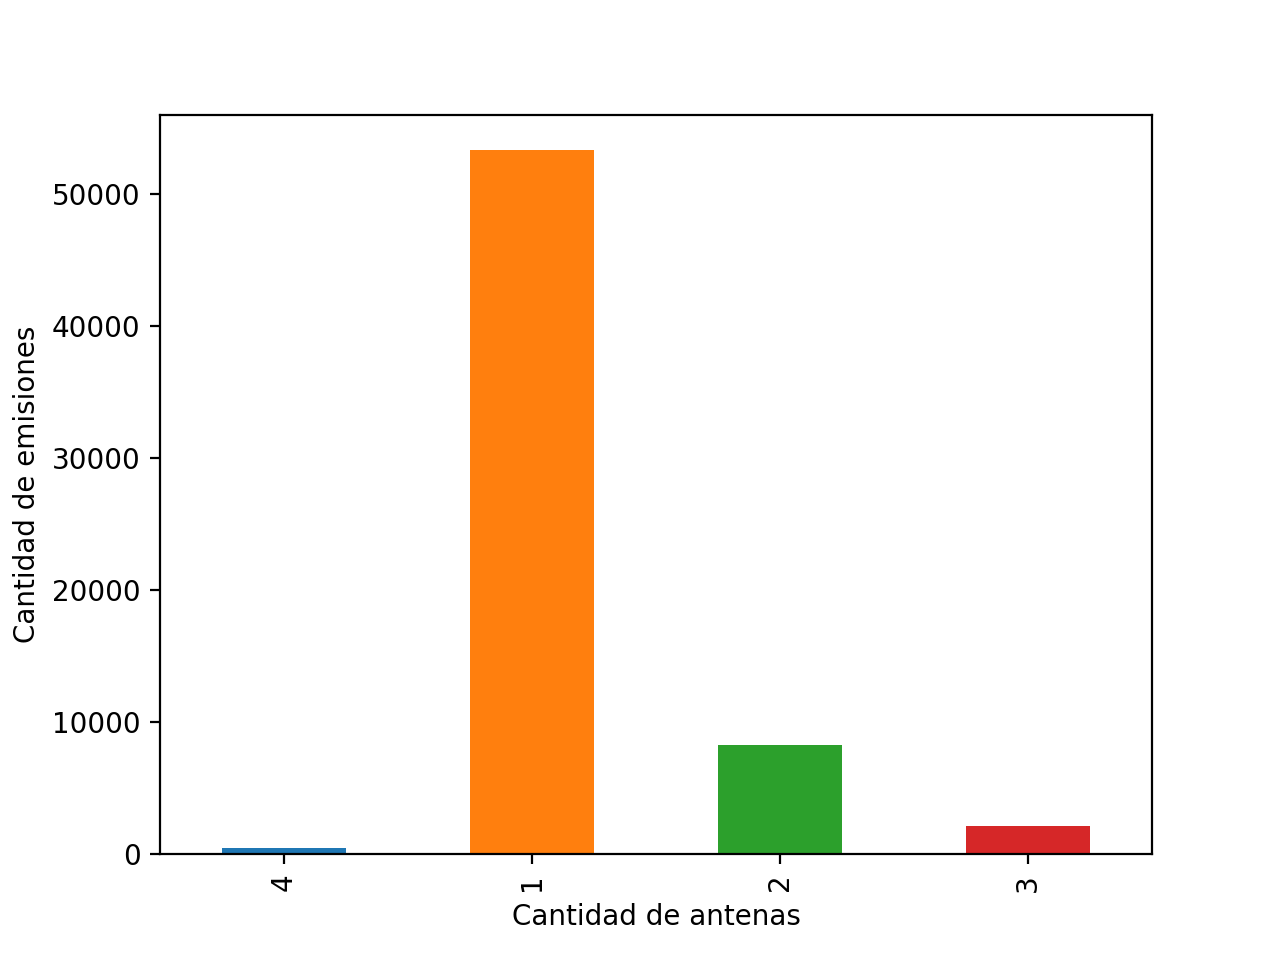

Text(0.5,0,'Cantidad de antenas')

In [9]:
cant_recep = birds_recep.groupBy(lambda x: sum([x['recep_{}'.format(i)] > 0 for i in range(4)])).map(lambda x: {'antennas': x[0],'cant_recep': len(x[1])})

p = pd.DataFrame(cant_recep.collect()).plot.bar(x='antennas', y='cant_recep', legend=False)
p.set_ylabel('Cantidad de emisiones')
p.set_xlabel('Cantidad de antenas')

### Ejemplo del mejor pajaro

<IPython.core.display.Javascript object>


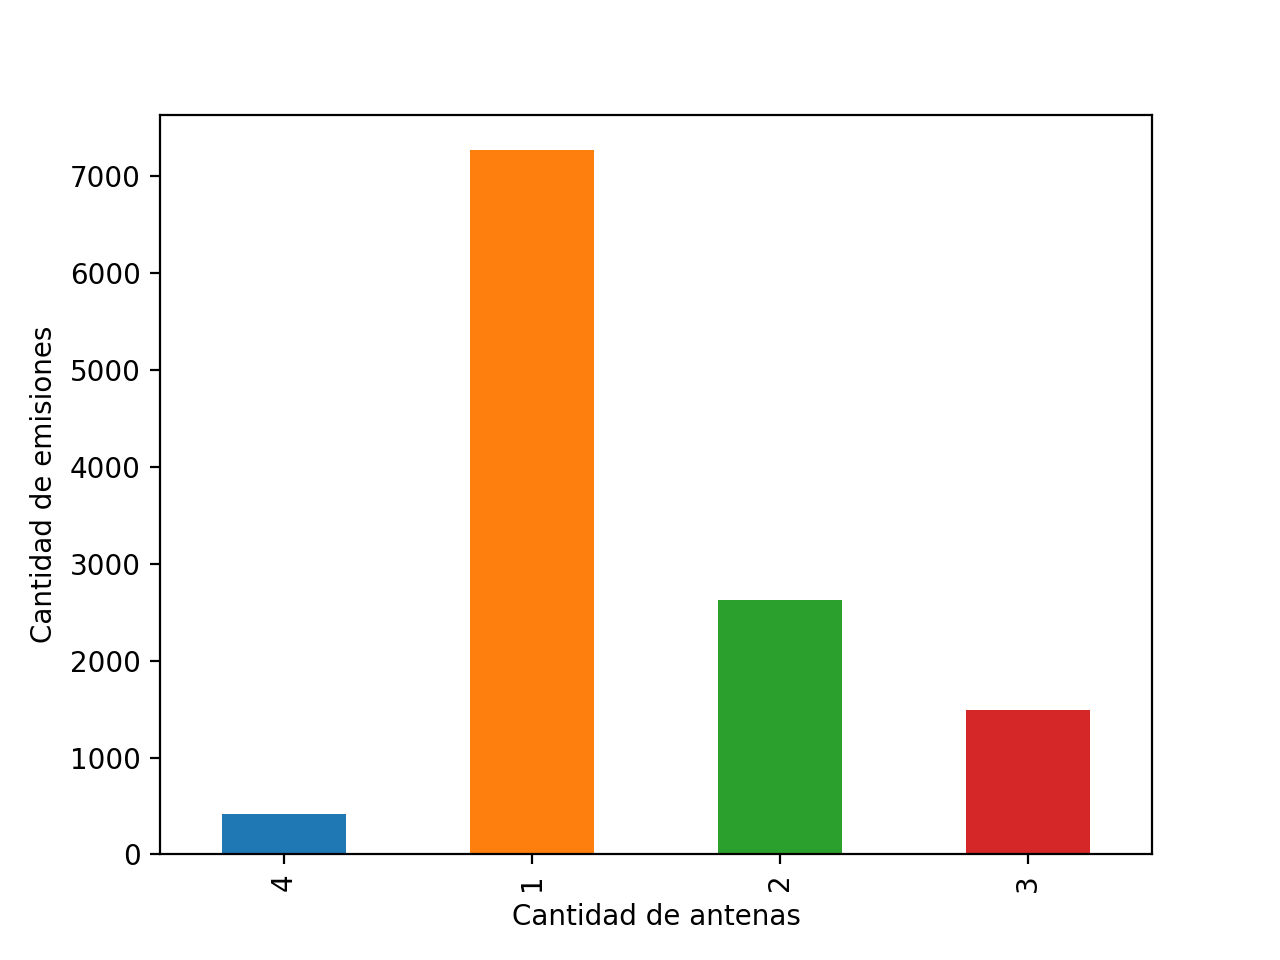

Text(0.5,0,'Cantidad de antenas')

In [33]:
cant_recep = birds_recep.filter(lambda x: x['tag_id'] == 20).groupBy(lambda x: sum([x['recep_{}'.format(i)] > 0 for i in range(4)])).map(lambda x: {'antennas': x[0],'cant_recep': len(x[1])})

p = pd.DataFrame(cant_recep.collect()).plot.bar(x='antennas', y='cant_recep', legend=False)
p.set_ylabel('Cantidad de emisiones')
p.set_xlabel('Cantidad de antenas')

## Cantidad de emisiones (es decir, agrupamiento de recepciones) por pajaro

<IPython.core.display.Javascript object>


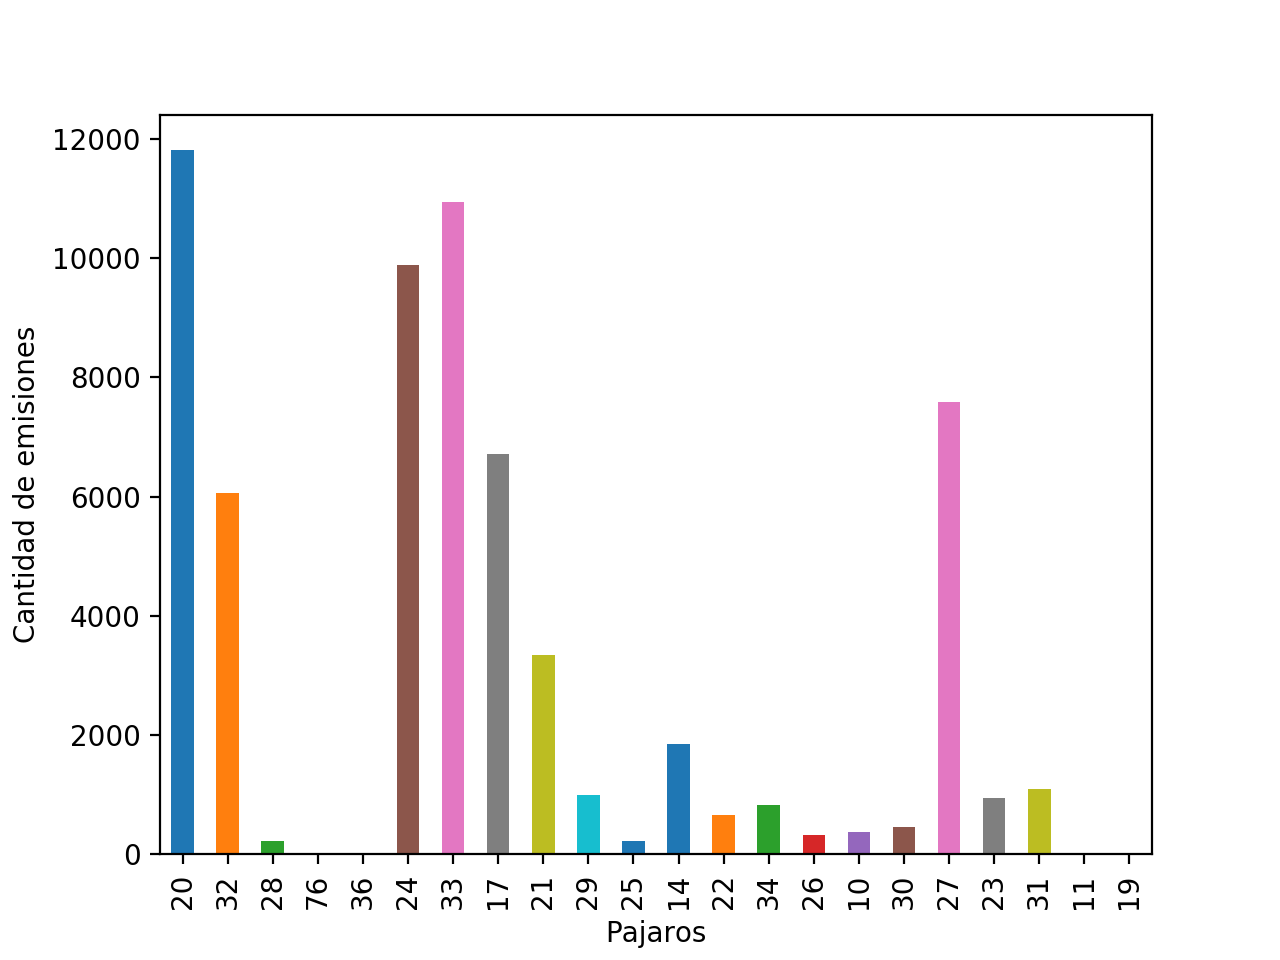

Text(0.5,0,'Pajaros')

In [29]:
cant_by_bird = birds_recep.groupBy(lambda x: x['tag_id']).map(lambda x: {'tag_id': x[0],'cant_emisiones': len(x[1])})

p = pd.DataFrame(cant_by_bird.collect()).plot.bar(x='tag_id', y='cant_emisiones', legend=False)
p.set_ylabel('Cantidad de emisiones')
p.set_xlabel('Pajaros')

## Promedio de antenas usadas por pajaro

<IPython.core.display.Javascript object>


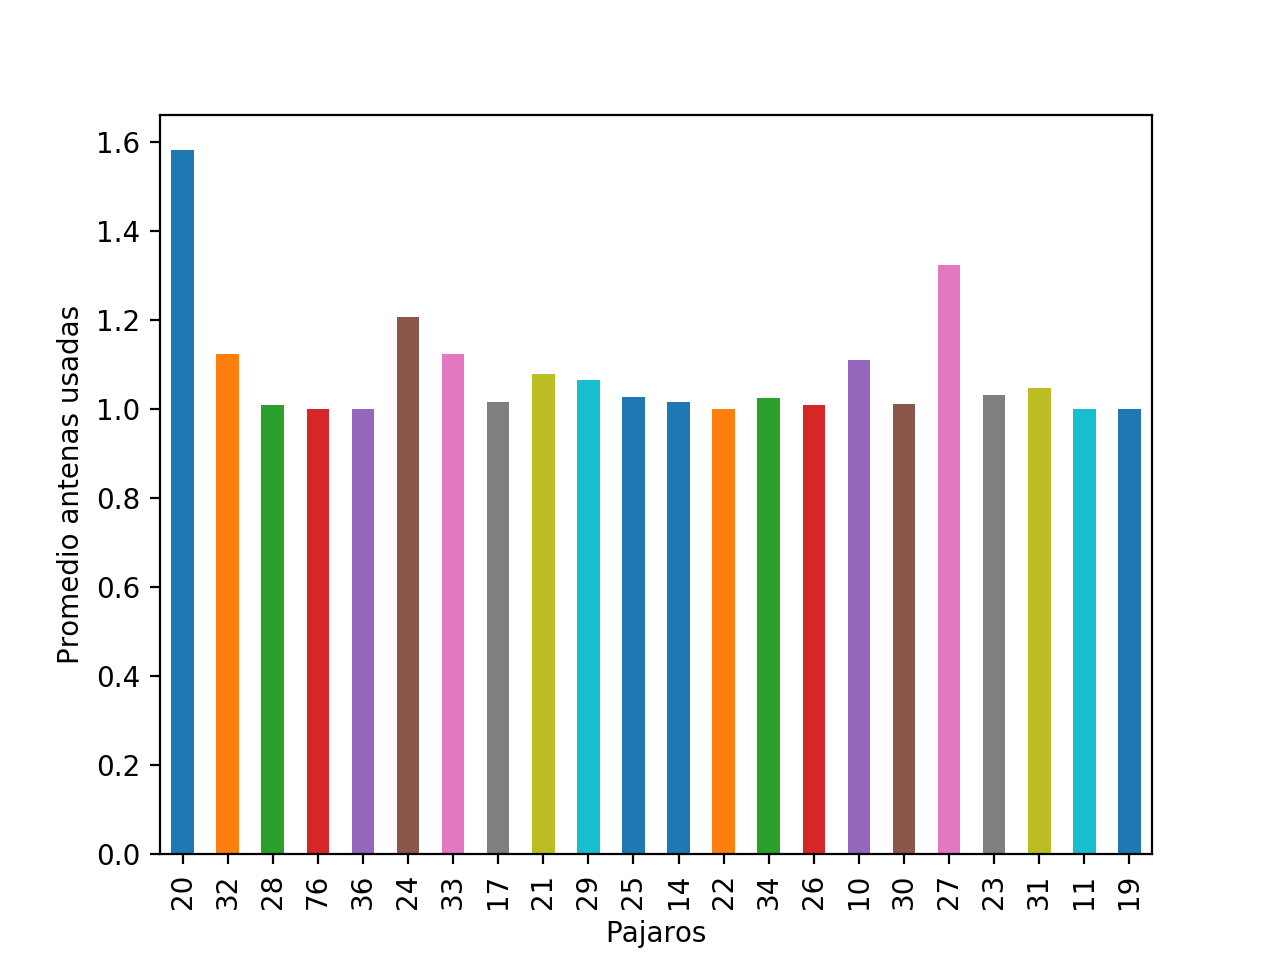

Text(0.5,0,'Pajaros')

In [30]:
cant_by_bird = (
    birds_recep
    .map(lambda x: {'tag_id': x['tag_id'], 'cant_recep': sum([x['recep_{}'.format(i)] > 0 for i in range(4)])})
    .groupBy(lambda x: x['tag_id'])
    .map(lambda x: {'tag_id': x[0],'cant_recep': np.mean(list(map(lambda e: e['cant_recep'], x[1])))})
)

p = pd.DataFrame(cant_by_bird.collect()).plot.bar(x='tag_id', y='cant_recep', legend=False)
p.set_ylabel('Promedio antenas usadas')
p.set_xlabel('Pajaros')